In [1]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
u0 = Expression(f"exp(-pow(x[0] - c, 2) / pow(l, 2))", degree=1, l=Constant(l), c=Constant(center), domain=mesh)
grad(u0)

NameError: name 'l' is not defined

In [ ]:
plot(grad(u0))

In [ ]:
u0.

In [ ]:
import ufl

In [ ]:
ufl.

In [3]:
u0 = Expression(f"exp(-pow(x[0] - c, 2) / pow(l, 2))", degree=1, l=Constant(l), c=Constant(center))
u0_ = project(u0, V)
grad(u0_)

NameError: name 'l' is not defined

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


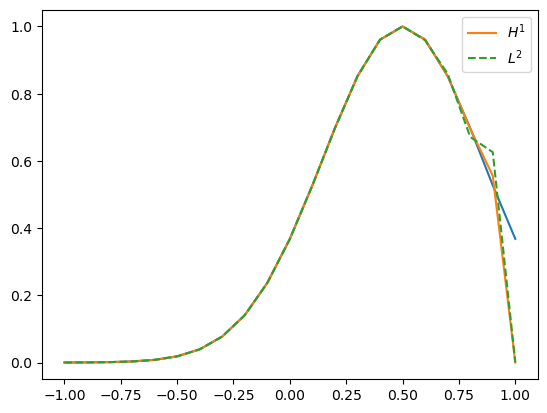

In [11]:
mesh = IntervalMesh(20, -1, 1)
center = 0.5
l = 0.5
uD = Constant(0.0)
u0 = Expression(f"exp(-pow(x[0] - c, 2) / pow(l, 2))", degree=1, l=Constant(l), c=Constant(center))


V = FunctionSpace(mesh, "CG", 1)

a = 0.001
# Project u0 to have Dirichlet boundary equal to g0.
u = TrialFunction(V)
v = TestFunction(V)
u0_ = project(u0, V)
a0 = u * v * dx + a * inner(grad(u), grad(v)) * dx
L0 = u0_ * v * dx + a * inner(grad(u0_), grad(v)) * dx
u1 = Function(V)
A = assemble(a0)
b = assemble(L0)
bcs = DirichletBC(V, uD, "on_boundary")
bcs.apply(A, b)
solve(A, u1.vector(), b)

u2 = project(u0, V, bcs=bcs)

plot(u0, mesh=mesh)
plot(u1, label="$H^1$")
plot(u2, linestyle="dashed", label="$L^2$")
plt.legend()
plt.show()